# Mini Project

### Project Description

* The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also,       certain attributes of each product and store have been defined. The aim of this data science project is to build a               predictive model and find out the sales of each product at a particular store.
* Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing       sales.
* The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required       to treat them accordingly.

## Problem in the Structured way 
1. Problem Statement
2. Hypothesis Generation
3. Loading Packages and Data
4. Data Structure and Content
5. Exploratory Data Analysis
6. Univariate Analysis
7. Bivariate Analysis
8. Missing Value Treatment
9. Feature Engineering
10. Encoding Categorical Variables
11. Label Encoding
12. One Hot Encoding
13. PreProcessing Data
14. Modeling
15. Linear Regression
16. Regularized Linear Regression
17. RandomForest
18. XGBoost
19. Summary

### Data Source
 Data Source link: https://shahyaseen71.gitbook.io/machine-learning-project/
* The Folder will be in Compress format, which we have to extract, and after that, we will be getting to files which will be train.csv and test.csv.

In [1]:
# Importing all the comman library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
# Importing both the file
sales_train = pd.read_csv("../ML_Internship/9961_14084_bundle_archive/Train.csv")
sales_test = pd.read_csv("../ML_Internship/9961_14084_bundle_archive/Test.csv")

print(sales_train.shape)
sales_train.head(5)

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [165]:
print(sales_test.shape)
sales_test.head(5)

(5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
# Seeing all the columns of the Sales_train
sales_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# Seeing all the columns of the Sales_test
sales_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
# Describing the dataset of train
sales_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
#Describing the dataset of test 
sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [18]:
# And now the information of the dataset of train and test
print(sales_train.info(), sales_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [24]:
# Seeing the null values in train and test data
print(sales_train.isnull().sum())
print("##############################")
print(sales_test.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
##############################
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


Filling all the missing value by the accurate or near accurate value in place by using the `fillna()` method

In [51]:
sales_train["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [166]:
# Filling the null value of train dataset
sales_train["Item_Weight"] = sales_train["Item_Weight"].fillna(sales_train["Item_Weight"].mean())
# After going through the data we realise that the frequent size was medium
sales_train["Outlet_Size"] = sales_train["Outlet_Size"].fillna('Medium')

In [52]:
sales_test["Outlet_Size"].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [167]:
# Filling the null value of test dataset
sales_test["Item_Weight"] = sales_test["Item_Weight"].fillna(sales_test["Item_Weight"].mean())
# Same goes with the test dataset also
sales_test["Outlet_Size"] = sales_test["Outlet_Size"].fillna('Medium')

In [28]:
sales_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
sales_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Data Analysis through visualization 

C:\Miniconda3\Codes\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


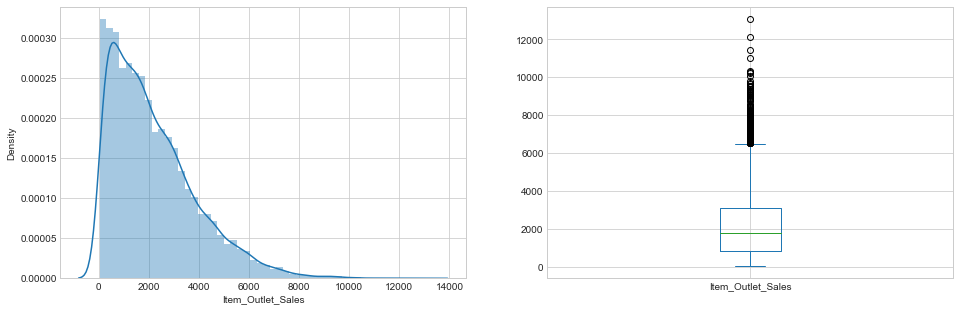

In [168]:
# For changing the style of the graph
plt.style.use('seaborn-whitegrid')

# Focusing on the target variable which also known as dependent feature in our case for train dataset it is `Item_outlet_Sales`
plt.figure(1)
plt.subplot(121)
sns.distplot(sales_train['Item_Outlet_Sales'])
plt.subplot(122)
sales_train['Item_Outlet_Sales'].plot.box(figsize=(16,5))
plt.show()

C:\Miniconda3\Codes\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

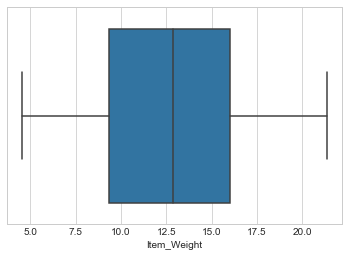

In [169]:
sns.boxplot(sales_train['Item_Weight'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

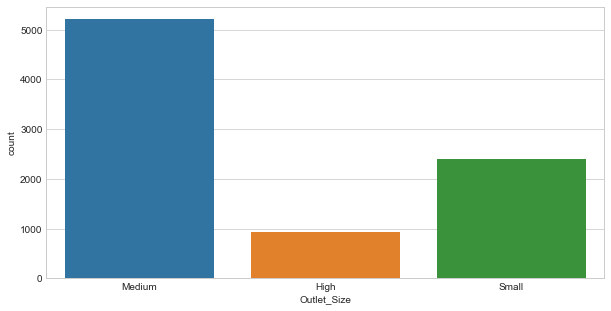

In [170]:
# Moving on from train dependent feature to independent features. Analysis of the independent features with the visualize format.
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Size',data=sales_train)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

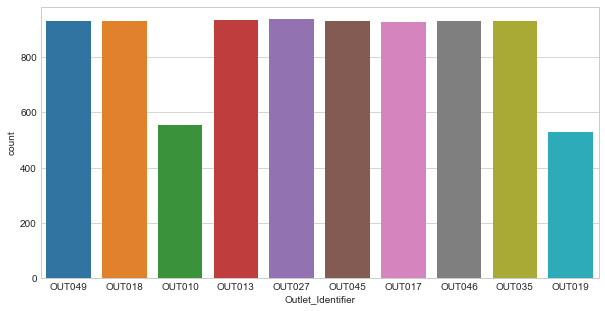

In [171]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Identifier',data=sales_train)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

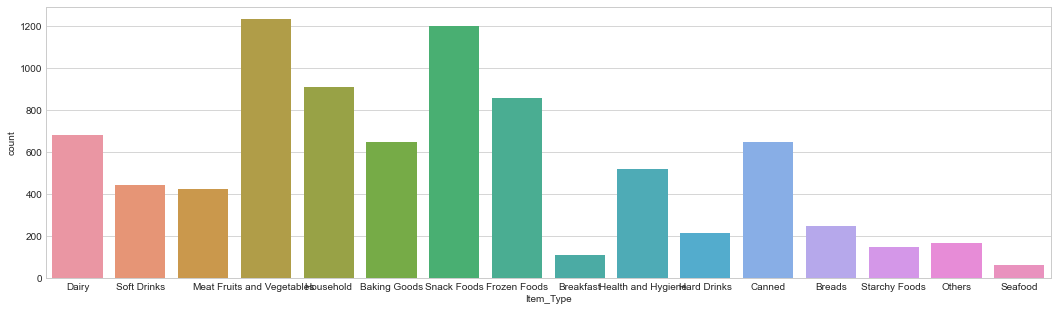

In [172]:
plt.figure(figsize=(18,5))
sns.countplot(x='Item_Type',data=sales_train)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

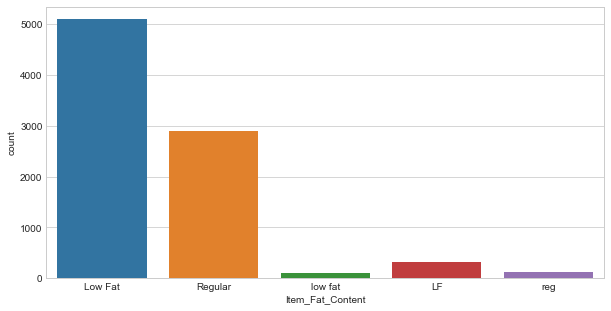

In [173]:
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Fat_Content',data=sales_train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

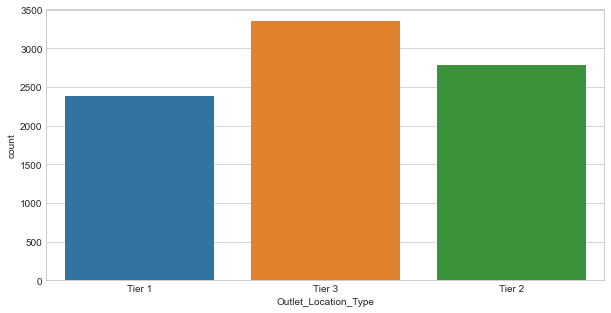

In [174]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Location_Type',data=sales_train)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

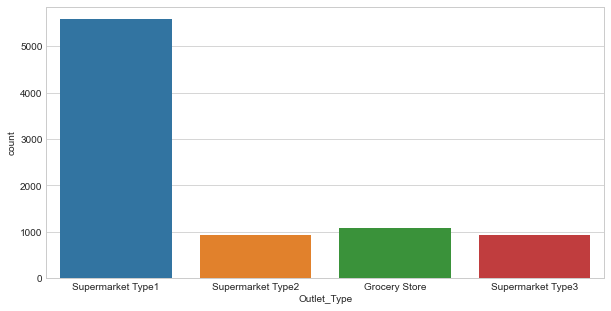

In [175]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Type',data=sales_train)

### Now we will be see how the each Categorical independent feature is correlate with the target features which is `Item_Outlet_Sales`. Here we will be analysing the relation with the help of Bi-variate  Analysis.

The Analysis will be done Scatter plot and the bar plot.

In [176]:
sales_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Fat_Content'>

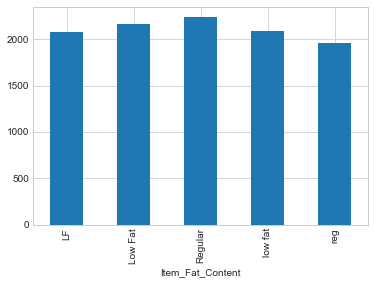

In [177]:
sales_train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar()

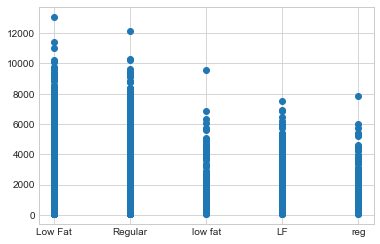

In [178]:
plt.scatter(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = sales_train)

<AxesSubplot:xlabel='Item_Type'>

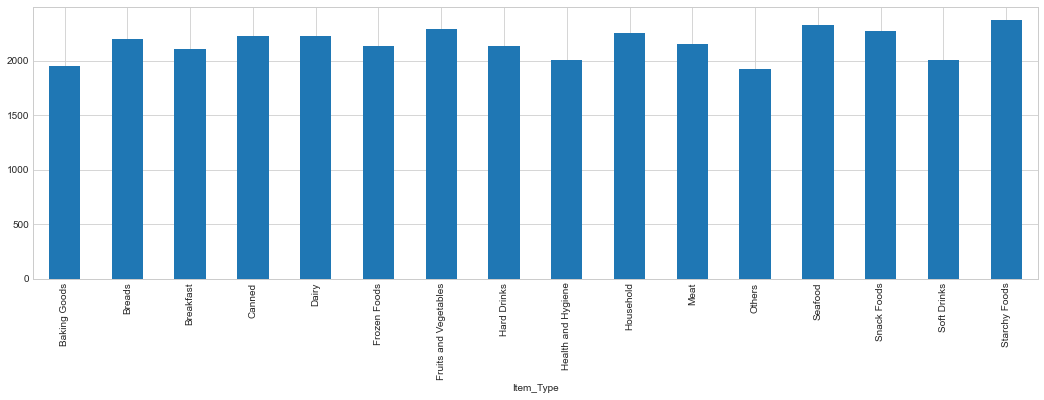

In [179]:
plt.figure(figsize=(18,5))
sales_train.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()

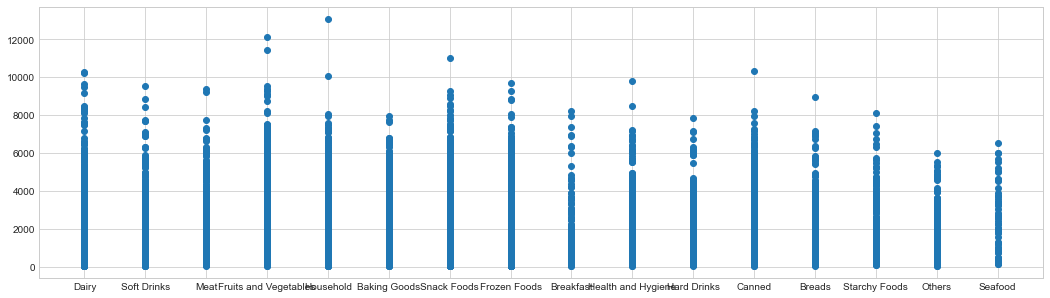

In [180]:
plt.figure(figsize=(18,5))
plt.scatter(x = 'Item_Type', y = 'Item_Outlet_Sales', data = sales_train)

<AxesSubplot:xlabel='Outlet_Identifier'>

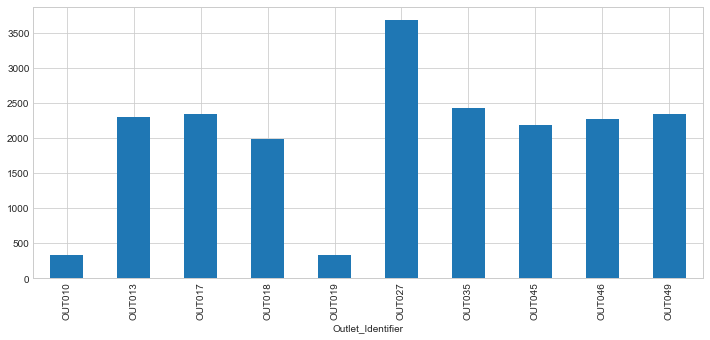

In [181]:
plt.figure(figsize=(12,5))
sales_train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot.bar()

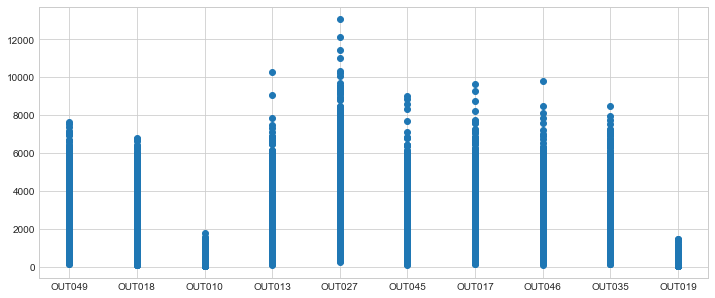

In [182]:
plt.figure(figsize=(12,5))
plt.scatter(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = sales_train)

<AxesSubplot:xlabel='Outlet_Size'>

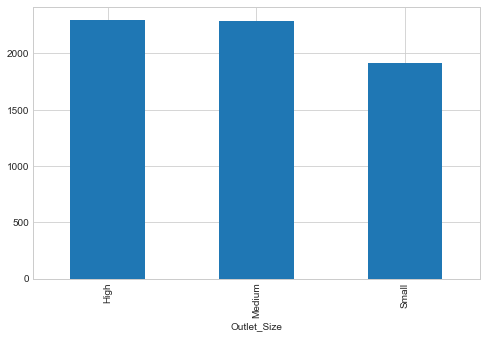

In [183]:
plt.figure(figsize=(8,5))
sales_train.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar()

### Numerical Independent Variable vs Target Variable

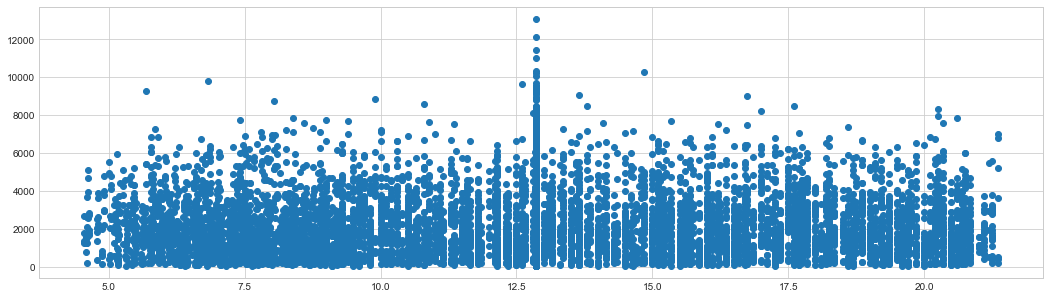

In [184]:
plt.figure(figsize=(18,5))
plt.scatter(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = sales_train)

 The Understanding for the correlation of the feature variable with target one would be better if we will use the metrics, using  heatmap.

In [185]:
sales_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

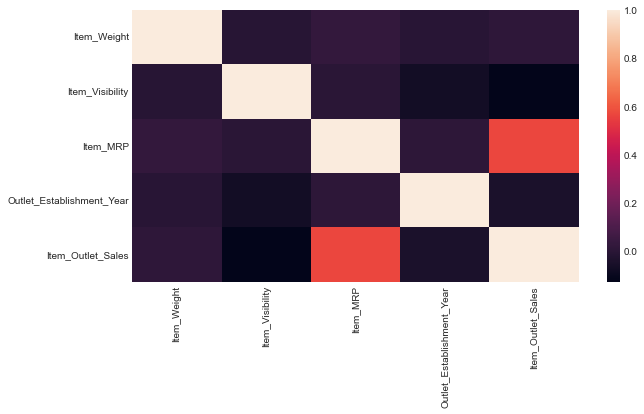

In [186]:
# visualizing the correlation of the feature with target
plt.figure(figsize=(10,5))
sns.heatmap(sales_train.corr())

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

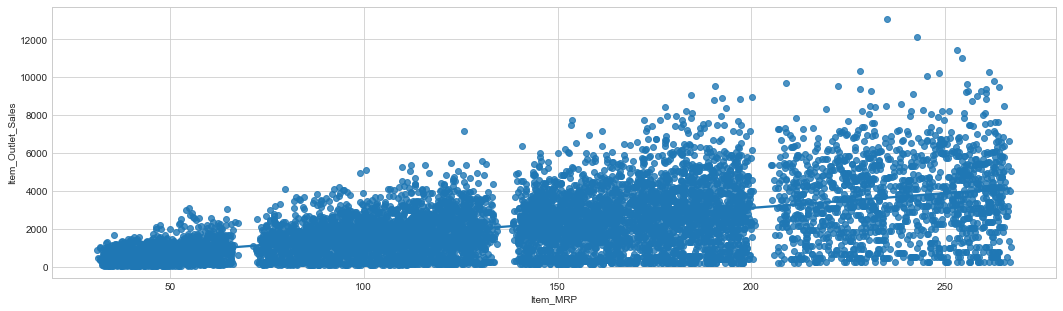

In [187]:
plt.figure(figsize=(18,5))
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=sales_train)

 With both the visualization we understand that the higher the `Item_MRP` the higher the `Item_Outlet_Sales`. 

### Converting the Categorical variables in Numerical values

In [188]:
sales_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [189]:
sales_train["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [190]:
# Item_Identifier
sales_train_1 = pd.get_dummies(sales_train['Outlet_Identifier'])
sales_train = pd.concat([sales_train, sales_train_1], axis=1)
sales_train["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [191]:
sales_train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [192]:
def fun(x):
  if x=='Low_Fat' or x=='Regular' or x=='reg':
    return(0)
  else:
    return(1)

sales_train['Item_Fat_Content']=sales_train['Item_Fat_Content'].apply(fun)

In [193]:
sales_train["Item_Fat_Content"]

0       1
1       0
2       1
3       0
4       1
       ..
8518    1
8519    0
8520    1
8521    0
8522    1
Name: Item_Fat_Content, Length: 8523, dtype: int64

In [194]:
# Now the Size section
def fun1(x):
  if x=='Medium':
    return(0)
  elif x=='High':
    return(1)
  else:
    return(2)

sales_train['Outlet_Size'] = sales_train['Outlet_Size'].apply(fun1)
sales_train['Outlet_Size']

0       0
1       0
2       0
3       0
4       1
       ..
8518    1
8519    0
8520    2
8521    0
8522    2
Name: Outlet_Size, Length: 8523, dtype: int64

In [195]:
def fun2(x):
  if x=='Tier 1':
    return(0)
  elif x=='Tier 2':
    return(1)
  else:
    return(2)

sales_train['Outlet_Location_Type'] = sales_train['Outlet_Location_Type'].apply(fun2)
sales_train['Outlet_Location_Type']

0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 8523, dtype: int64

In [196]:
#Outlet Type
def fun3(x):
  if x=='Supermarket Type1':
    return(0)
  elif x=='Supermarket Type2':
    return(1)
  elif x=='Supermarket Type3':
    return(2)
  else:
    return(3)
sales_train['Outlet_Type'] = sales_train['Outlet_Type'].apply(fun3)
sales_train['Outlet_Type']

0       0
1       1
2       0
3       3
4       0
       ..
8518    0
8519    0
8520    0
8521    1
8522    0
Name: Outlet_Type, Length: 8523, dtype: int64

In [211]:
sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,FDA15,9,1,0,Dairy,249,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5,0,0,Soft Drinks,48,OUT018,2009,0,2,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17,1,0,Meat,141,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19,0,0,Fruits and Vegetables,182,OUT010,1998,0,2,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8,1,0,Household,53,OUT013,1987,1,2,...,0,1,0,0,0,0,0,0,0,0


In [204]:
# Now Float to integer

sales_train["Item_Weight"] = sales_train["Item_Weight"].astype(int)
sales_train["Item_Visibility"] = sales_train["Item_Visibility"].astype(int)
sales_train["Item_MRP"] = sales_train["Item_MRP"].astype(int)
sales_train["Item_Outlet_Sales"] = sales_train["Item_Outlet_Sales"].astype(int)

In [205]:
sales_train.dtypes

Item_Identifier              object
Item_Weight                   int32
Item_Fat_Content              int64
Item_Visibility               int32
Item_Type                    object
Item_MRP                      int32
Outlet_Identifier            object
Outlet_Establishment_Year     int64
Outlet_Size                   int64
Outlet_Location_Type          int64
Outlet_Type                   int64
Item_Outlet_Sales             int32
OUT010                        uint8
OUT013                        uint8
OUT017                        uint8
OUT018                        uint8
OUT019                        uint8
OUT027                        uint8
OUT035                        uint8
OUT045                        uint8
OUT046                        uint8
OUT049                        uint8
dtype: object

Now we we will be droping the feature which has no correlation with the target feature such as `Item_Identifier`, `Item_Type` , `Outlet_Establishment_Year`.
The Target feature will be `Item_Outlet_Sales`.

## LinearRegression

In [222]:
# Import the linearSVC estimator class
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score 

# Setup the random seed
np.random.seed(42)

# Creating dataset on x and y
x = sales_train.drop(["Item_Identifier", "Item_Type", "Outlet_Establishment_Year", "Outlet_Identifier", "Item_Outlet_Sales"], axis=1)
y = sales_train["Item_Outlet_Sales"]

#Split the data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

lrm = LinearRegression()
lrm.fit(x_train, y_train)

# Evaluate the LinearRegression
lrm_score = lrm.score(x_test, y_test)
np.mean(lrm_score)
print(f"LinearRegression Model accuracy: {np.mean(lrm_score)*100:.2f}%")

LinearRegression Model accuracy: 58.13%


In [248]:
# Compairing the single train score and multiple train score
np.random.seed(42)
lrm_single_score = lrm.score(x_test,y_test)
lrm_cross_val_score = np.mean(cross_val_score(lrm,x,y, cv=5))
print("Single score",lrm_single_score)
print("Cross score",lrm_cross_val_score)

Single score 0.5813205293585394
Cross score 0.5615012242066324


In [227]:
# Now making prediction 
from sklearn.metrics import mean_squared_error, mean_absolute_error, SCORERS
predicted=lrm.predict(x_test)
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",lrm.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 1137958.0787850397
MEAN ABSOLUTE ERROR(MAE) 790.3286988964805
ROOT MEAN SQUARED ERROR(RMSE) 1066.7511794158186
SCORE 0.5813205293585394


In [228]:
# In tabular way to represent
df = pd.DataFrame(data={"actual values": y_test,
                        "prediction values": predicted})

df["difference"] = df["prediction values"] - df["actual values"]
df.head(10)

,actual values,prediction values,difference
7503,1743,1353.004171,-389.995829
2957,356,690.857176,334.857176
7031,377,853.373453,476.373453
1084,5778,4251.245447,-1526.754553
856,2356,3324.589344,968.589344
4304,865,655.280941,-209.719059
2132,4613,4764.572836,151.572836
1385,2410,2044.846980,-365.153020
5239,1948,1377.889432,-570.110568
6516,1937,2780.594207,843.594207


## RandomForest Regressor and classifier

 ` Classifier cannot handle this much large dataset`

In [236]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
#create x and y
x = sales_train.drop(["Item_Identifier", "Item_Type", "Outlet_Establishment_Year", "Outlet_Identifier", "Item_Outlet_Sales"], axis=1)
y = sales_train["Item_Outlet_Sales"]
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#Making model
clf = RandomForestClassifier(n_estimators=100)
#fitting the model
#clf.fit(x_train, y_train)
#Making prediction
#y_pred = clf.predict(x_test)
#Evaluate model using evalustion function
#print("Classifier metrics on test set")
#print(f"Accuracy : {accuracy_score(y_test, y_pred)*100:.2f}%")
#print(f"Precison : {precision_score(y_test, y_pred)}")
#print(f"Recall score : {recall_score(y_test, y_pred)}")
#print(f"F1 score : {f1_score(y_test, y_pred)}")

In [257]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

#create x,y
x = sales_train.drop(["Item_Identifier", "Item_Type", "Outlet_Establishment_Year", "Outlet_Identifier", "Item_Outlet_Sales"], axis=1)
y = sales_train["Item_Outlet_Sales"]

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#mdoel
model = RandomForestRegressor(n_estimators=100)

#fitting
model.fit(x_train, y_train)

#Score
model_score = model.score(x_test, y_test)
np.mean(model_score)
print(f"RandomForstRegressor Model accuracy: {np.mean(model_score)*100:.2f}%")

RandomForstRegressor Model accuracy: 50.36%


In [246]:
from sklearn.model_selection import cross_val_score

# Compairing the single train score and multiple train score
np.random.seed(42)
model_single_score = model.score(x_test,y_test)
model_cross_val_score = np.mean(cross_val_score(model,x,y, cv=5))
print("Single score",model_single_score)
print("Cross score",model_cross_val_score)

Single score 0.503628724218331
Cross score 0.49845328691278307


In [244]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, SCORERS
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Prediction
y_pred = model.predict(x_test)

#Evaluate
print("Regressioin metrics on the test set")
print(f"R2 Score : {r2_score(y_test, y_pred)}")
print(f"Mean_Absolute_Error : {mean_absolute_error(y_test, y_pred)}")
print(f"Mean_Square_Error : {mean_squared_error(y_test, y_pred)}")
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",lrm.score(x_test,y_test))

Regressioin metrics on the test set
R2 Score : 0.503628724218331
Mean_Absolute_Error : 809.4441695398198
Mean_Square_Error : 1349122.0443342458
ROOT MEAN SQUARED ERROR(RMSE) 1066.7511794158186
SCORE 0.5813205293585394


In [249]:
# In tabular way to represent
df = pd.DataFrame(data={"actual values": y_test,
                        "prediction values": predicted})

df["difference"] = df["prediction values"] - df["actual values"]
df.head(10)

,actual values,prediction values,difference
7503,1743,1353.004171,-389.995829
2957,356,690.857176,334.857176
7031,377,853.373453,476.373453
1084,5778,4251.245447,-1526.754553
856,2356,3324.589344,968.589344
4304,865,655.280941,-209.719059
2132,4613,4764.572836,151.572836
1385,2410,2044.846980,-365.153020
5239,1948,1377.889432,-570.110568
6516,1937,2780.594207,843.594207


## XGBoost regression

In [253]:
import xgboost as xg
from sklearn.model_selection import train_test_split

np.random.seed(42)

#create x,y
x = sales_train.drop(["Item_Identifier", "Item_Type", "Outlet_Establishment_Year", "Outlet_Identifier", "Item_Outlet_Sales"], axis=1)
y = sales_train["Item_Outlet_Sales"]

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#mdoel
xgb_r = xg.XGBRegressor()

#fitting
xgb_r.fit(x_train, y_train)

#Score
xgb_r_score = model.score(x_test, y_test)
np.mean(xgb_r_score)
print(f"XGBoost Model accuracy: {np.mean(xgb_r_score)*100:.2f}%")

XGBoost Model accuracy: 50.36%


In [254]:
from sklearn.model_selection import cross_val_score

# Compairing the single train score and multiple train score
np.random.seed(42)
xgb_r_single_score = xgb_r.score(x_test,y_test)
xgb_r_cross_val_score = np.mean(cross_val_score(xgb_r,x,y, cv=5))
print("Single score",xgb_r_single_score)
print("Cross score",xgb_r_cross_val_score)

Single score 0.5186832630696916
Cross score 0.5120293402057186


In [256]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, SCORERS

np.random.seed(42)

#Prediction
y_pred = xgb_r.predict(x_test)

#Evaluate
print("Regressioin metrics on the test set")
print(f"R2 Score : {r2_score(y_test, y_pred)}")
print(f"Mean_Absolute_Error : {mean_absolute_error(y_test, y_pred)}")
print(f"Mean_Square_Error : {mean_squared_error(y_test, y_pred)}")
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",lrm.score(x_test,y_test))

Regressioin metrics on the test set
R2 Score : 0.5186832630696916
Mean_Absolute_Error : 791.0571315709446
Mean_Square_Error : 1308204.2651987132
ROOT MEAN SQUARED ERROR(RMSE) 1066.7511794158186
SCORE 0.5813205293585394


## Summary

### Compairing all the model
     LinearRegression : LinearRegression Model accuracy: 58.13%
         > Single score 0.5813205293585394
         > Cross score 0.5615012242066324
         > Regressioin metrics on the test set
         > MEAN SQUARED ERROR(MSE) 1137958.0787850397
         > MEAN ABSOLUTE ERROR(MAE) 790.3286988964805
         > ROOT MEAN SQUARED ERROR(RMSE) 1066.7511794158186
         > SCORE 0.5813205293585394
         
         
     Random Forest Regressor : RandomForstRegressor Model accuracy: 50.36%
         > Single score 0.503628724218331
         > Cross score 0.49845328691278307
         > Regressioin metrics on the test set
         > R2 Score : 0.503628724218331
         > Mean_Absolute_Error : 809.4441695398198
         > Mean_Square_Error : 1349122.0443342458
         > ROOT MEAN SQUARED ERROR(RMSE) 1066.7511794158186
         > SCORE 0.5813205293585394
         
         
     XGBoost : XGBoost Model accuracy: 50.36%
         > Single score 0.5186832630696916
         > Cross score 0.5120293402057186
         > XGBoost Regressioin metrics on the test set
         > R2 Score : 0.5186832630696916
         > Mean_Absolute_Error : 791.0571315709446
         > Mean_Square_Error : 1308204.2651987132
         > ROOT MEAN SQUARED ERROR(RMSE) 1066.7511794158186
         > SCORE 0.5813205293585394
         
         
` We discovered that the Linear Regression model gave us the most incredible score, 58.13%, out of all the tested models we tested. As a result, we conclude that linear regression is our predictive model and complete our investigation.`
         